# Dependencies

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# Dataset

In [5]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
x = np.append(np.ones((1000,1)),np.array(mnist.train.images[:1000,:]),axis=1)

In [7]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

# One-Vs-All Logistic Regression

## Way One

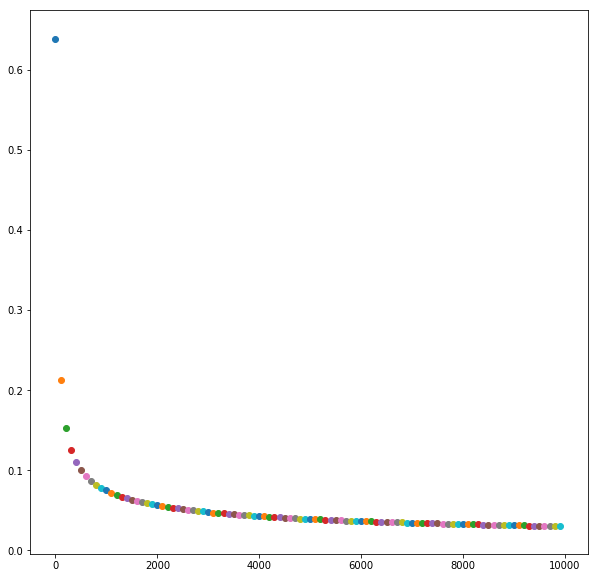

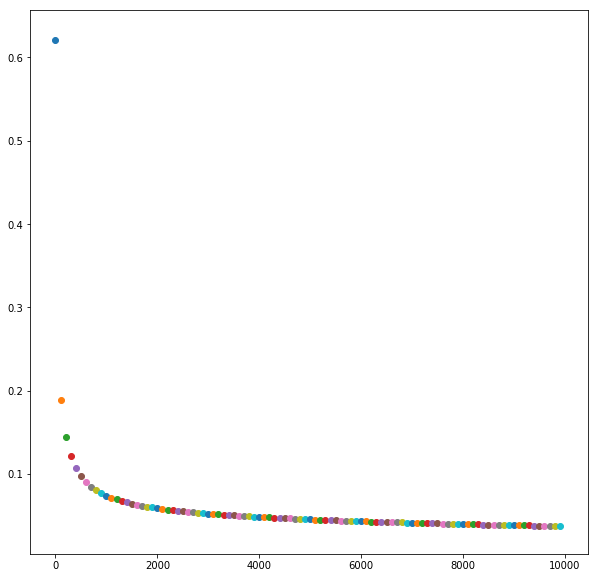

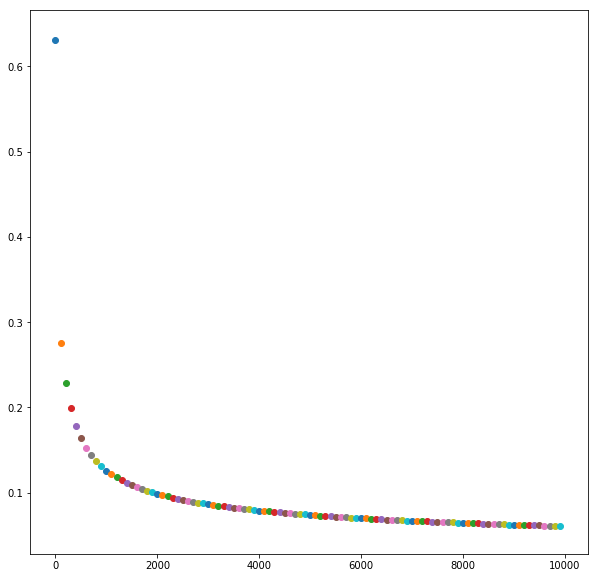

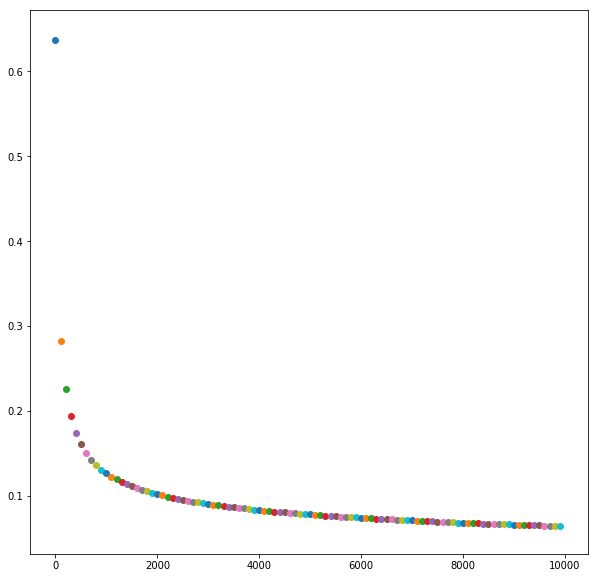

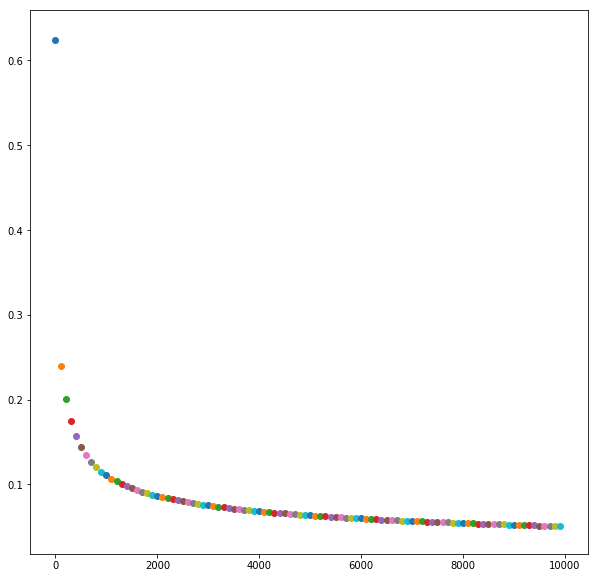

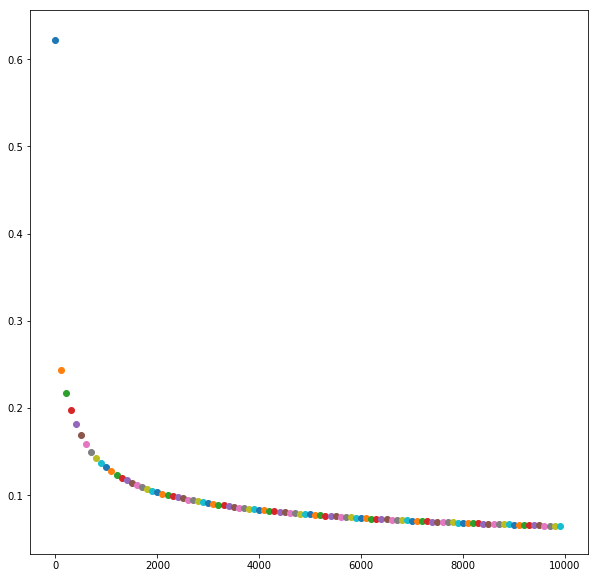

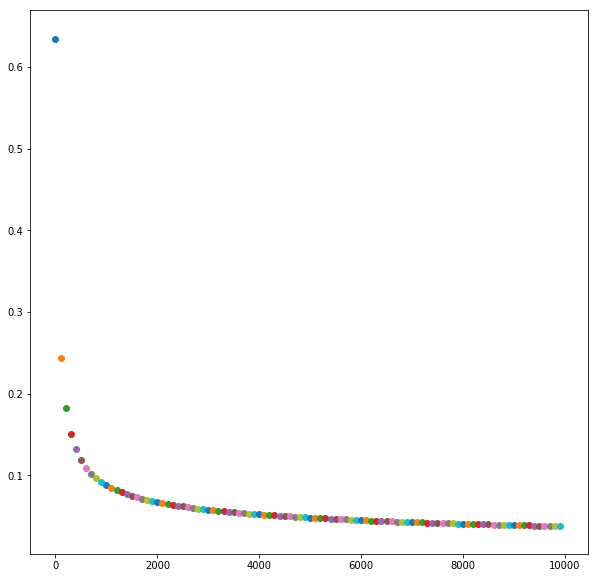

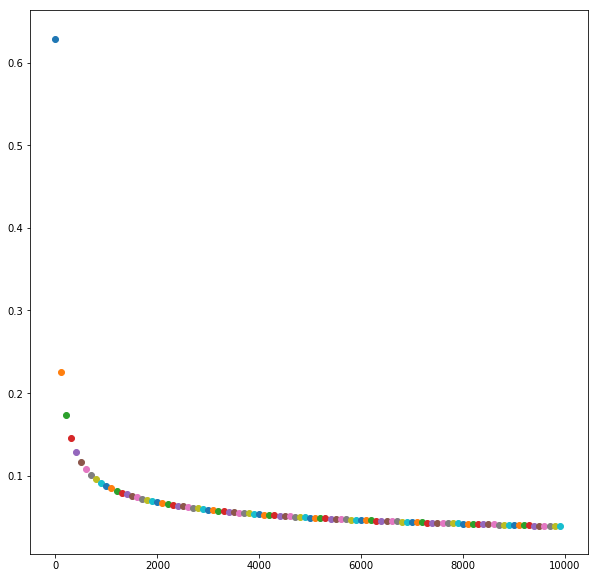

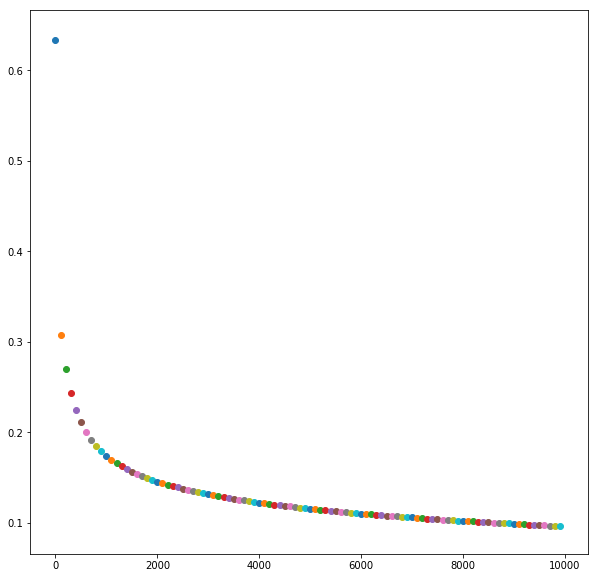

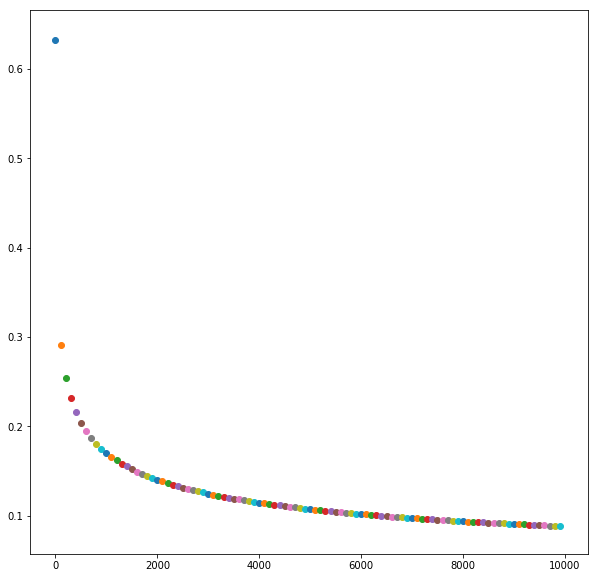

In [161]:
lr = 0.01
lamb = 1
thetas = np.zeros((785,1))
for i in range(10):
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    y = np.zeros(1000)
    for j in range(1000):
        if np.argmax(mnist.train.labels[j]) == i:
            y[j] = 1
    theta = np.zeros(785)
    predict = sigmoid(x@theta)
    for j in range(10000):
        regulGD = (lamb/y.size) * theta
        regulGD[0] = 0.0
        #print(regulGD)
        grad = ((x.T @ (predict - y)) / y.size) + regulGD
        theta -= (grad * lr)
        predict = sigmoid(x@theta)
        bRegul = theta**2
        bRegul[0] = 0.0
        regulLoss = (lamb/(2*y.size)) * np.sum(bRegul)
        loss = np.mean(-y*np.log(predict)-(1-y)*(np.log(1-predict))) + regulLoss
        #print(loss)
        if i % 100 == 0:
            plt.scatter(i,loss)
    thetas = np.append(thetas,theta.reshape(785,1),axis=1)
    plt.show()
thetas = thetas[:,1:]

### Testing

In [29]:
print("---------------")
print("Test 0")
print("Predict: ", np.argmax(np.append(np.ones(1),mnist.test.images[0]) @ thetas))
print("True:    ", np.argmax(mnist.test.labels[0]))
print("---------------")
print("Test 1")
print("Predict: ",np.argmax(np.append(np.ones(1),mnist.test.images[1]) @ thetas))
print("True:    ",np.argmax(mnist.test.labels[1]))
print("---------------")
print("Test 2")
print("Predict: ",np.argmax(np.append(np.ones(1),mnist.test.images[2]) @ thetas))
print("True:    ",np.argmax(mnist.test.labels[2]))
print("---------------")
print("Test 3")
print("Predict: ",np.argmax(np.append(np.ones(1),mnist.test.images[3]) @ thetas))
print("True:    ",np.argmax(mnist.test.labels[3]))
print("---------------")
print("Test 4")
print("Predict: ",np.argmax(np.append(np.ones(1),mnist.test.images[4]) @ thetas))
print("True:    ",np.argmax(mnist.test.labels[4]))
print("")
print("---------------")
print("")
print("Model Accuracy:")
print(np.equal(np.argmax(mnist.test.labels,1),
               np.argmax((np.append(np.ones((10000,1)),mnist.test.images,axis=1) @ thetas),1)).astype(int).mean() * 100,"%")
print("")
print("---------------")

---------------
Test 0
Predict:  7
True:     7
---------------
Test 1
Predict:  2
True:     2
---------------
Test 2
Predict:  1
True:     1
---------------
Test 3
Predict:  0
True:     0
---------------
Test 4
Predict:  4
True:     4

---------------

Model Accuracy:
85.63 %

---------------


## Way Two

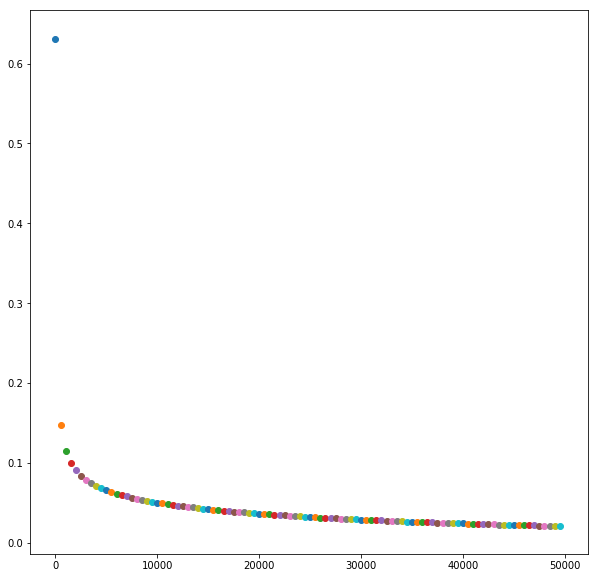

In [27]:
fig = plt.gcf()
fig.set_size_inches(10,10)
y = mnist.train.labels[:1000]
lr = 0.1
lamb = 0
thetas = np.zeros((785,10))
predict = sigmoid(x@thetas)
for i in range(50000):
    regulGD = (lamb/y.size) * thetas
    regulGD[0] = 0.0
    #print(regulGD)
    grad = ((x.T @ (predict - y)) / y.size) + regulGD
    thetas -= (grad * lr)
    predict = sigmoid(x@thetas)
    bRegul = thetas**2
    bRegul[0] = 0.0
    regulLoss = (lamb/(2*y.size)) * np.sum(bRegul)
    loss = np.mean(-y*np.log(predict)-(1-y)*(np.log(1-predict))) + regulLoss
    #print(loss)
    if i % 500 == 0:
        plt.scatter(i,loss)
plt.show()

### Testing

In [28]:
print("---------------")
print("Test 0")
print("Predict: ", np.argmax(np.append(np.ones(1),mnist.test.images[0]) @ thetas))
print("True:    ", np.argmax(mnist.test.labels[0]))
print("---------------")
print("Test 1")
print("Predict: ",np.argmax(np.append(np.ones(1),mnist.test.images[1]) @ thetas))
print("True:    ",np.argmax(mnist.test.labels[1]))
print("---------------")
print("Test 2")
print("Predict: ",np.argmax(np.append(np.ones(1),mnist.test.images[2]) @ thetas))
print("True:    ",np.argmax(mnist.test.labels[2]))
print("---------------")
print("Test 3")
print("Predict: ",np.argmax(np.append(np.ones(1),mnist.test.images[3]) @ thetas))
print("True:    ",np.argmax(mnist.test.labels[3]))
print("---------------")
print("Test 4")
print("Predict: ",np.argmax(np.append(np.ones(1),mnist.test.images[4]) @ thetas))
print("True:    ",np.argmax(mnist.test.labels[4]))
print("")
print("---------------")
print("")
print("Model Accuracy:")
print(np.equal(np.argmax(mnist.test.labels,1),
               np.argmax((np.append(np.ones((10000,1)),mnist.test.images,axis=1) @ thetas),1)).astype(int).mean() * 100,"%")
print("")
print("---------------")

---------------
Test 0
Predict:  7
True:     7
---------------
Test 1
Predict:  2
True:     2
---------------
Test 2
Predict:  1
True:     1
---------------
Test 3
Predict:  0
True:     0
---------------
Test 4
Predict:  4
True:     4

---------------

Model Accuracy:
85.63 %

---------------
